In [31]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns


## Base de datos de hongos

respuestas en [bd hongos res](https://datascienceplus.com/mushrooms-classification-part-1/)

In [32]:
data_file = 'agaricus-lepiota.data'
data=[]
with open(data_file, 'r') as file:
    reader = csv.reader(file)
    for row in reader:
        # Procesar cada fila del archivo .data
        data.append(row)
        #print(row)

df=pd.DataFrame(data)
column_names=['class','cap-shape','cap-surface','cap-color','bruises','odor','gill-attachment','gill-spacing','gill-size',
              'gill-color','stalk-shape','stalk-root','ssar','ssbr','scar','scbr','veil-type','veil-color',
              'ring-number','ring-type','spore-p-color','population','habitat']
df.columns=column_names
# Leer el archivo .names
names_file = 'agaricus-lepiota.names'
with open(names_file, 'r') as file:
    lines = file.readlines()
    for line in lines:
        # Procesar cada línea del archivo .names
        print(line)


1. Title: Mushroom Database



2. Sources: 

    (a) Mushroom records drawn from The Audubon Society Field Guide to North

        American Mushrooms (1981). G. H. Lincoff (Pres.), New York: Alfred

        A. Knopf

    (b) Donor: Jeff Schlimmer (Jeffrey.Schlimmer@a.gp.cs.cmu.edu)

    (c) Date: 27 April 1987



3. Past Usage:

    1. Schlimmer,J.S. (1987). Concept Acquisition Through Representational

       Adjustment (Technical Report 87-19).  Doctoral disseration, Department

       of Information and Computer Science, University of California, Irvine.

       --- STAGGER: asymptoted to 95% classification accuracy after reviewing

           1000 instances.

    2. Iba,W., Wogulis,J., & Langley,P. (1988).  Trading off Simplicity

       and Coverage in Incremental Concept Learning. In Proceedings of 

       the 5th International Conference on Machine Learning, 73-79.

       Ann Arbor, Michigan: Morgan Kaufmann.  

       -- approximately the same results with their HILLARY algor

In [33]:
class_column = df['class']
df = df.drop('class', axis=1)
df['class'] = class_column
df

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,scar,scbr,veil-type,veil-color,ring-number,ring-type,spore-p-color,population,habitat,class
0,x,s,n,t,p,f,c,n,k,e,...,w,w,p,w,o,p,k,s,u,p
1,x,s,y,t,a,f,c,b,k,e,...,w,w,p,w,o,p,n,n,g,e
2,b,s,w,t,l,f,c,b,n,e,...,w,w,p,w,o,p,n,n,m,e
3,x,y,w,t,p,f,c,n,n,e,...,w,w,p,w,o,p,k,s,u,p
4,x,s,g,f,n,f,w,b,k,t,...,w,w,p,w,o,e,n,a,g,e
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,k,s,n,f,n,a,c,b,y,e,...,o,o,p,o,o,p,b,c,l,e
8120,x,s,n,f,n,a,c,b,y,e,...,o,o,p,n,o,p,b,v,l,e
8121,f,s,n,f,n,a,c,b,n,e,...,o,o,p,o,o,p,b,c,l,e
8122,k,y,n,f,y,f,c,n,b,t,...,w,w,p,w,o,e,w,v,l,p


## Imputación del atributo 'stalk-root'

Se realizará una imputación por modas de clases. [métodos](https://www.analyticsvidhya.com/blog/2021/04/how-to-handle-missing-values-of-categorical-variables/) Básicamente reemplaza el valor más frecuente de cada clase de salida (venenoso y comestible).

In [34]:
moda_venenoso=df['stalk-root'][(df['class']=='p') & (df['stalk-root']!='?')].mode()
print('Moda de stalk-root venenoso:', str(moda_venenoso[0]))
moda_comestible=df['stalk-root'][(df['class']=='e') & (df['stalk-root']!='?')].mode()
print('Moda de stalk-root comestible;',str(moda_comestible[0]))

Moda de stalk-root venenoso: b
Moda de stalk-root comestible; b


In [35]:
#df['stalk-root'][df['class']=='p'].replace('?',moda_venenoso[0],inplace=True)
#df['stalk-root'][df['class']=='e'].replace('?',moda_comestible[0],inplace=True)
#df['stalk-root'][df['class']].replace('?','b',inplace=True)
condicion = df['class'] == 'p'
df['stalk-root'] = np.where(condicion, df['stalk-root'].replace('?', moda_venenoso[0]), df['stalk-root'])

condicion = df['class'] == 'e'
df['stalk-root'] = np.where(condicion, df['stalk-root'].replace('?', moda_comestible[0]), df['stalk-root'])

In [36]:
df['stalk-root'].value_counts()

b    6256
e    1120
c     556
r     192
Name: stalk-root, dtype: int64

Se asigna un número único a cada valor único en la columna 0 venenoso ('p', poisonus) 1 no venenoso ('e', edible)

Los métodos de codificación que se hicieron fueron obtenidos de [codificación](https://towardsdatascience.com/6-ways-to-encode-features-for-machine-learning-algorithms-21593f6238b0)

In [37]:
# División de xy
d_temp_class=pd.factorize(df['class'])[0]
d_temp_class=pd.DataFrame(d_temp_class,columns=['class'])
d_temp_x=df.drop('class',axis=1)

# Codificación ordinal

Se asigma un número único a cada valor único de la característica

<img src="label-ordinal encoding ejemplo.png" width="200"/>

In [38]:
from category_encoders import OrdinalEncoder
encoder=OrdinalEncoder(cols=list(d_temp_x.columns))
encoder.fit(d_temp_x)
denc_ord=encoder.transform(d_temp_x)
denc_ord=pd.concat([denc_ord,d_temp_class],axis=1)
denc_ord.shape

(8124, 23)

## Codificación por frecuencia

Básicamente se cuenta la cantidad de valores diferentes y se calcula su porcentaje de aparición

$$Ci_{freq}=\frac{fi_{cat}}{n_{instancias}}$$

Donde:
* $Ci_{freq}$ es el valor codificado de la categoria $i$ 
* $f_{cat}$ es la frecuencia (numero de veces que aparece) la categoria $i$
* $n_{instancias}$ es el número de instancias (renglones).

<img src="freq-count encoding ejemplo.png" width="200"/>


In [39]:
from category_encoders import CountEncoder
encoder = CountEncoder(cols=list(d_temp_x.columns), normalize=True)
d_count_x = encoder.fit_transform(d_temp_x)
denc_count=pd.concat([d_count_x,d_temp_class],axis=1) ### Segunda codificacion
denc_count.shape

(8124, 23)

## Codificación binaria

Permite aumentar poco la dimensión del modelo. En comparación a One-hot

In [40]:
from category_encoders import BinaryEncoder

encoder_bin=BinaryEncoder(cols=list(d_temp_x.columns))
d_bin_x=encoder_bin.fit_transform(d_temp_x)
denc_bin=pd.concat([d_bin_x,d_temp_class],axis=1) ### Segunda codificacion
denc_bin.shape

(8124, 65)

In [41]:
#tree=fit(d_temp_x,d_temp_class,list(d_temp_x.columns))  ### drop class en x


In [42]:
### Método de segregación 80/20
tr=int(len(df)*0.8)
np.random.seed(167)
## Sin codificar
train_raw=df.sample(tr).reset_index(drop=True) # Prueba con 
test_raw=df[~df.isin(train_raw)].dropna().reset_index(drop=True)
## Codificación ordinal
train_ordinal=denc_ord.sample(tr).reset_index(drop=True)
test_ordinal=denc_ord[~denc_ord.isin(train_ordinal)].dropna().reset_index(drop=True)
## Codificación por frecuencias
train_freq=denc_count.sample(tr).reset_index(drop=True)
test_freq=denc_count[~denc_count.isin(train_freq)].dropna().reset_index(drop=True)
## Codificación binaria
train_bin=denc_bin.sample(tr).reset_index(drop=True)
test_bin=denc_bin[~denc_bin.isin(train_bin)].dropna().reset_index(drop=True)


In [43]:
#from sklearn.model_selection import cross_val_score
#knn1=KNeighborsClassifier()
"""
k_values=range(1,50)
cross_val_scores=[]
X=denc_ord.drop('class',axis=1)
y=denc_ord['class']
for k in k_values:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=5) 
    cross_val_scores.append(np.mean(scores))

best_k=k_values[np.argmax(cross_val_scores)]

for k,score in zip(k_values,cross_val_scores):
        print(f"K = {k}, Puntaje promedio: {score:.4f}")

print(f"\nMejor valor de k: {best_k}")
plt.scatter(k_values,cross_val_scores)
"""

'\nk_values=range(1,50)\ncross_val_scores=[]\nX=denc_ord.drop(\'class\',axis=1)\ny=denc_ord[\'class\']\nfor k in k_values:\n    knn=KNeighborsClassifier(n_neighbors=k)\n    scores = cross_val_score(knn, X, y, cv=5) \n    cross_val_scores.append(np.mean(scores))\n\nbest_k=k_values[np.argmax(cross_val_scores)]\n\nfor k,score in zip(k_values,cross_val_scores):\n        print(f"K = {k}, Puntaje promedio: {score:.4f}")\n\nprint(f"\nMejor valor de k: {best_k}")\nplt.scatter(k_values,cross_val_scores)\n'

## Stratified kfolds 

Se obtuvo de [g4g](https://www.geeksforgeeks.org/stratified-k-fold-cross-validation/)

In [44]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
skf=StratifiedKFold(n_splits=5)



## Codificación ordinal

### Segregación

In [103]:
knn_ords=KNeighborsClassifier(n_neighbors=5)
knn_ords.fit(train_ordinal.drop('class',axis=1),train_ordinal['class'])
y_pred_seg=knn_ords.predict(test_ordinal.drop('class',axis=1))
report=classification_report(test_ordinal['class'],y_pred_seg)
print(report)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1118
         1.0       1.00      1.00      1.00       507

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



## K-fold

In [104]:
from sklearn.model_selection import KFold


kfold=KFold(n_splits=7,shuffle=True,random_state=13)
knn_kfold_ord=KNeighborsClassifier(n_neighbors=5)
#scores=cross_val_score(knn_kfold_ord,knn_ord_stf,denc_ord.drop('class',axis=1),denc_ord['class'])
#y_pred_kfold_ord=knn_kfold_ord.fit().
#print(scores)
all_y_true = []
all_y_pred = []
for train_index,test_index in kfold.split(denc_ord.drop('class',axis=1),denc_ord['class']):
    x_train,x_test=denc_ord.drop('class',axis=1).iloc[train_index],denc_ord.drop('class',axis=1).iloc[test_index]
    y_train,y_test=denc_ord.iloc[train_index]['class'],denc_ord.iloc[test_index]['class']
    
    knn_kfold_ord.fit(x_train,y_train)
    y_pred=knn_kfold_ord.predict(x_test)
    report = classification_report(y_test, y_pred)
    #print(report) ## Por si se desea observar el reporte por fold, se descomenta esto####
    all_y_true.extend(y_test)
    all_y_pred.extend(y_pred)
    
all_y_true = np.array(all_y_true)
all_y_pred = np.array(all_y_pred)

# Genera el informe de clasificación general
report = classification_report(all_y_true, all_y_pred)
print("Informe de clasificación general:")
print(report)

Informe de clasificación general:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3916
           1       1.00      1.00      1.00      4208

    accuracy                           1.00      8124
   macro avg       1.00      1.00      1.00      8124
weighted avg       1.00      1.00      1.00      8124



### STF

              precision    recall  f1-score   support

           0       0.83      0.92      0.87      3916
           1       0.92      0.82      0.87      4208

    accuracy                           0.87      8124
   macro avg       0.88      0.87      0.87      8124
weighted avg       0.88      0.87      0.87      8124



Text(0.5, 1.0, 'Matriz de Confusión de STF codificación ordinal')

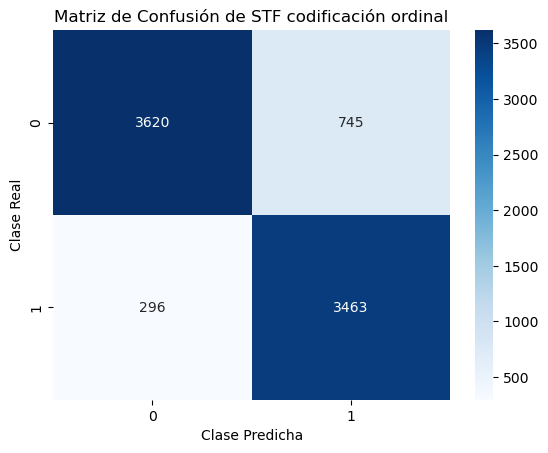

In [105]:
skf_ord=StratifiedKFold(n_splits=7)
knn_ord_stf=KNeighborsClassifier(n_neighbors=5)
y_pred_ord_stf=cross_val_predict(knn_ord_stf,denc_ord.drop('class',axis=1),denc_ord['class'])
rep_ord_stf=classification_report(denc_ord['class'],y_pred_ord_stf)
print(rep_ord_stf)
confusion = confusion_matrix(y_pred_ord_stf, denc_ord['class'])
sns.heatmap(confusion,annot=True, fmt='d', cmap='Blues')
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Real')
plt.title('Matriz de Confusión de STF codificación ordinal')

## Codificación frecuencias normalizadas

### Segregación

In [106]:
knn_frec=KNeighborsClassifier(n_neighbors=5)
knn_frec.fit(train_freq.drop('class',axis=1),train_freq['class'])
y_pred_seg=knn_frec.predict(test_freq.drop('class',axis=1))
report=classification_report(test_freq['class'],y_pred_seg)
print(report)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1118
         1.0       1.00      1.00      1.00       507

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



### K-folds

In [107]:
kfold=KFold(n_splits=7,shuffle=True,random_state=13)
knn_kfold_count=KNeighborsClassifier(n_neighbors=5)
#scores=cross_val_score(knn_kfold_ord,knn_ord_stf,denc_ord.drop('class',axis=1),denc_ord['class'])
#y_pred_kfold_ord=knn_kfold_ord.fit().
#print(scores)
all_y_true = []
all_y_pred = []
for train_index,test_index in kfold.split(denc_count.drop('class',axis=1),denc_count['class']):
    x_train,x_test=denc_count.drop('class',axis=1).iloc[train_index],denc_count.drop('class',axis=1).iloc[test_index]
    y_train,y_test=denc_count.iloc[train_index]['class'],denc_count.iloc[test_index]['class']
    
    knn_kfold_count.fit(x_train,y_train)
    y_pred=knn_kfold_count.predict(x_test)
    report = classification_report(y_test, y_pred)
    #print(report) ## Por si se desea observar el reporte por fold, se descomenta esto####
    all_y_true.extend(y_test)
    all_y_pred.extend(y_pred)
    
all_y_true = np.array(all_y_true)
all_y_pred = np.array(all_y_pred)

# Genera el informe de clasificación general
report = classification_report(all_y_true, all_y_pred)
print("Informe de clasificación general:")
print(report)

Informe de clasificación general:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3916
           1       1.00      1.00      1.00      4208

    accuracy                           1.00      8124
   macro avg       1.00      1.00      1.00      8124
weighted avg       1.00      1.00      1.00      8124



### STF

              precision    recall  f1-score   support

           0       0.85      0.93      0.89      3916
           1       0.92      0.85      0.89      4208

    accuracy                           0.89      8124
   macro avg       0.89      0.89      0.89      8124
weighted avg       0.89      0.89      0.89      8124



Text(0.5, 1.0, 'Matriz de Confusión de STF codificación de frecuencia normalizada')

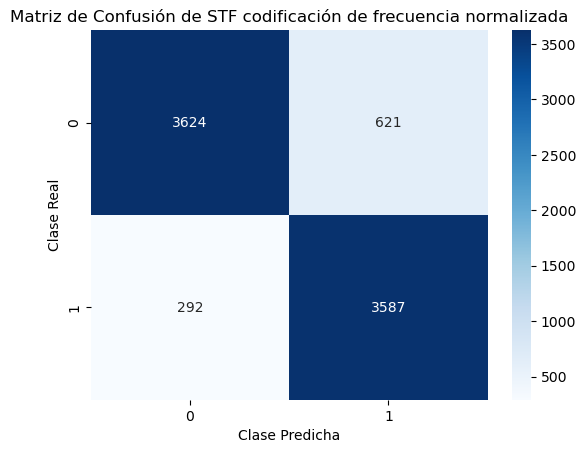

In [108]:
skf_count=StratifiedKFold(n_splits=7)
knn_count_stf=KNeighborsClassifier(n_neighbors=5)
y_pred_count_stf=cross_val_predict(knn_count_stf,denc_count.drop('class',axis=1),denc_count['class'])
rep_count_stf=classification_report(denc_count['class'],y_pred_count_stf)
print(rep_count_stf)
confusion = confusion_matrix(y_pred_count_stf, denc_count['class'])
sns.heatmap(confusion,annot=True, fmt='d', cmap='Blues')
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Real')
plt.title('Matriz de Confusión de STF codificación de frecuencia normalizada')

## Codificación binaria

### segregación

In [112]:
knn_bin=KNeighborsClassifier(n_neighbors=9)
knn_bin.fit(train_bin.drop('class',axis=1),train_bin['class'])
y_pred_seg=knn_bin.predict(test_bin.drop('class',axis=1))
report=classification_report(test_bin['class'],y_pred_seg)
print(report)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1118
         1.0       1.00      1.00      1.00       507

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



### Kfolds

In [113]:
kfold=KFold(n_splits=11,shuffle=True,random_state=13)
knn_kfold_bin=KNeighborsClassifier(n_neighbors=9)
#scores=cross_val_score(knn_kfold_ord,knn_ord_stf,denc_ord.drop('class',axis=1),denc_ord['class'])
#y_pred_kfold_ord=knn_kfold_ord.fit().
#print(scores)
all_y_true = []
all_y_pred = []
for train_index,test_index in kfold.split(denc_bin.drop('class',axis=1),denc_bin['class']):
    x_train,x_test=denc_bin.drop('class',axis=1).iloc[train_index],denc_bin.drop('class',axis=1).iloc[test_index]
    y_train,y_test=denc_bin.iloc[train_index]['class'],denc_bin.iloc[test_index]['class']
    
    knn_kfold_bin.fit(x_train,y_train)
    y_pred=knn_kfold_bin.predict(x_test)
    report = classification_report(y_test, y_pred)
    #print(report) ## Por si se desea observar el reporte por fold, se descomenta esto####
    all_y_true.extend(y_test)
    all_y_pred.extend(y_pred)
    
all_y_true = np.array(all_y_true)
all_y_pred = np.array(all_y_pred)

# Genera el informe de clasificación general
report = classification_report(all_y_true, all_y_pred)
print("Informe de clasificación general:")
print(report)

Informe de clasificación general:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3916
           1       1.00      1.00      1.00      4208

    accuracy                           1.00      8124
   macro avg       1.00      1.00      1.00      8124
weighted avg       1.00      1.00      1.00      8124



              precision    recall  f1-score   support

           0       0.90      0.94      0.92      3916
           1       0.94      0.90      0.92      4208

    accuracy                           0.92      8124
   macro avg       0.92      0.92      0.92      8124
weighted avg       0.92      0.92      0.92      8124



Text(0.5, 1.0, 'Matriz de Confusión de STF codificación binaria')

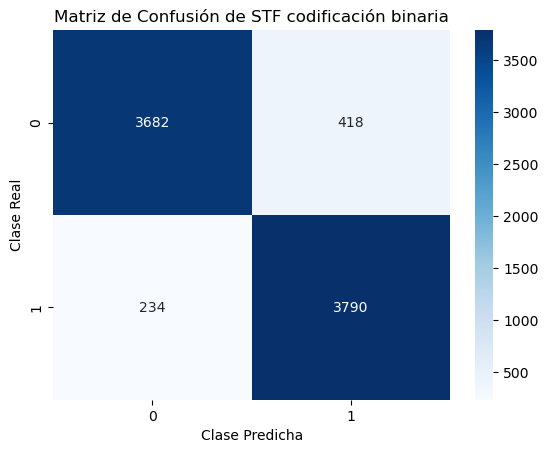

In [114]:
skf_bin=StratifiedKFold(n_splits=11)
knn_bin_stf=KNeighborsClassifier(n_neighbors=9)
y_pred_bin_stf=cross_val_predict(knn_bin_stf,denc_bin.drop('class',axis=1),denc_bin['class'])
rep_bin_stf=classification_report(denc_bin['class'],y_pred_bin_stf)
print(rep_bin_stf)
confusion = confusion_matrix(y_pred_bin_stf, denc_bin['class'])
sns.heatmap(confusion,annot=True, fmt='d', cmap='Blues')
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Real')
plt.title('Matriz de Confusión de STF codificación binaria')

# Arboles de decisión (ID3)

In [54]:
def entropy(y):
    # Calcular la entropía del conjunto de datos
    _, counts = np.unique(y, return_counts=True)
    probabilities = counts / len(y)
    entropy = -np.sum(probabilities * np.log2(probabilities))
    return entropy

def information_gain(df, target_col, feature_col):
    # Calcular la ganancia de información para una característica específica
    entropy_before = entropy(df[target_col])
    _, counts = np.unique(df[feature_col], return_counts=True)
    probabilities = counts / len(df)

    entropy_after = 0
    for value, probability in zip(df[feature_col], probabilities):
        subset_df = df[df[feature_col] == value]
        subset_y = subset_df[target_col]
        entropy_after += probability * entropy(subset_y)

    information_gain = entropy_before - entropy_after
    return information_gain

def best_feature(df, target_col):
    # Encontrar la mejor característica para dividir el conjunto de datos
    num_features = len(df.columns) - 1
    best_feature = None
    best_information_gain = -1

    for feature in df.columns[:-1]:
        information_gain_value = information_gain(df, target_col, feature)
        if information_gain_value > best_information_gain:
            best_information_gain = information_gain_value
            best_feature = feature

    return best_feature

def fit(df, target_col):
    # Construir el árbol de decisión mediante el algoritmo ID3 recursivo
    tree = {}

    if len(df[target_col].unique()) == 1:
        # Si todas las muestras tienen la misma clase, establecerla como la clase de la hoja
        tree['label'] = df[target_col].iloc[0]
        return tree

    if len(df.columns) == 1:
        # Si no quedan características para dividir, establecer la clase mayoritaria como la clase de la hoja
        majority_class = df[target_col].value_counts().idxmax()
        tree['label'] = majority_class
        return tree

    best_feature_col = best_feature(df, target_col)

    tree['feature'] = best_feature_col
    tree['children'] = {}

    unique_values = df[best_feature_col].unique()
    for value in unique_values:
        subset_df = df[df[best_feature_col] == value]
        if len(subset_df) == 0:
            majority_class = df[target_col].value_counts().idxmax()
            tree['children'][value] = {'label': majority_class}
        else:
            subset_df = subset_df.drop(columns=best_feature_col)
            tree['children'][value] = fit(subset_df, target_col)

    return tree

def predict_instance(tree, instance):
    # Predecir la clase de una instancia utilizando el árbol de decisión
    current_node = tree
    while 'label' not in current_node:
        feature = current_node['feature']
        feature_value = instance[feature]
        if feature_value not in current_node['children']:
            return None
        current_node = current_node['children'][feature_value]
    return current_node['label']

def predict_dataframe(tree, df):
    # Predecir la clase de un DataFrame de atributos utilizando el árbol de decisión
    predictions = []
    for _, instance in df.iterrows():
        prediction = predict_instance(tree, instance)
        predictions.append(prediction)
    return predictions

In [55]:
#import pandas as pd
def calculate_node_entropies(tree, df, target_col):
    node_entropies = {}

    def traverse_tree(node, path):
        if 'label' in node:
            return

        feature = node['feature']
        children = node['children']

        for value, child in children.items():
            if 'label' in child:
                continue

            new_path = path + [(feature, value)]
            traverse_tree(child, new_path)

        if feature not in node_entropies:
            node_entropies[feature] = {}

        node_entropies[feature][tuple(path)] = entropy(df[target_col])

    traverse_tree(tree, [])
    
    # Create a DataFrame from the node_entropies dictionary
    df_entropies = pd.DataFrame(node_entropies).T
    df_entropies.index.name = 'Node'
    df_entropies.columns.names = ['Feature', 'Path']
    
    return df_entropies

In [56]:
tree=fit(train_raw,'class')
res_raw_tree=predict_dataframe(tree,test_raw.drop('class',axis=1))
res_raw_tree=pd.DataFrame(res_raw_tree,columns=['class'])

In [57]:
tree


{'feature': 'odor',
 'children': {'n': {'feature': 'stalk-shape',
   'children': {'t': {'label': 'e'},
    'e': {'feature': 'habitat',
     'children': {'l': {'feature': 'cap-surface',
       'children': {'s': {'label': 'e'},
        'y': {'feature': 'cap-color',
         'children': {'n': {'label': 'e'},
          'y': {'label': 'p'},
          'w': {'label': 'p'},
          'c': {'label': 'e'}}},
        'f': {'label': 'e'},
        'g': {'label': 'p'}}},
      'w': {'label': 'e'},
      'p': {'label': 'e'},
      'm': {'label': 'p'},
      'g': {'feature': 'bruises',
       'children': {'f': {'label': 'e'}, 't': {'label': 'p'}}},
      'u': {'label': 'e'},
      'd': {'feature': 'ssar',
       'children': {'k': {'label': 'p'},
        's': {'label': 'e'},
        'y': {'label': 'e'}}}}}}},
  'a': {'label': 'e'},
  'f': {'label': 'p'},
  'l': {'label': 'e'},
  's': {'label': 'p'},
  'y': {'label': 'p'},
  'p': {'label': 'p'},
  'c': {'label': 'p'},
  'm': {'label': 'p'}}}

In [58]:
confusion = confusion_matrix(res_raw_tree, test_raw['class'])
report_tree=classification_report(test_raw['class'],res_raw_tree)
print(report_tree)

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       507
           p       1.00      1.00      1.00      1118

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



Text(0.5, 1.0, 'Matriz de Confusión')

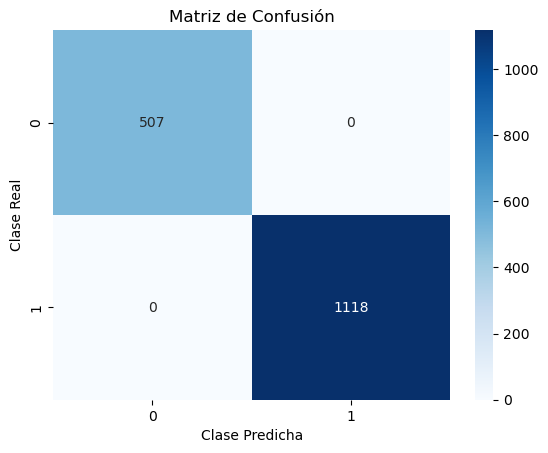

In [59]:
sns.heatmap(confusion,annot=True, fmt='d', cmap='Blues')
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Real')
plt.title('Matriz de Confusión')

In [60]:
confusion

array([[ 507,    0],
       [   0, 1118]], dtype=int64)

In [64]:
df['habitat'].value_counts()

d    3148
g    2148
p    1144
l     832
u     368
m     292
w     192
Name: habitat, dtype: int64

In [67]:
df['bruises'].value_counts()

f    4748
t    3376
Name: bruises, dtype: int64